https://twiecki.io/blog/2013/08/12/bayesian-glms-1/

https://twiecki.io/blog/2013/08/27/bayesian-glms-2/

https://twiecki.io/blog/2014/03/17/bayesian-glms-3/

https://docs.pymc.io/notebooks/getting_started.html

https://docs.pymc.io/notebooks/multilevel_modeling.html

https://docs.pymc.io/notebooks/GLM-hierarchical.html

https://vincentarelbundock.github.io/Rdatasets/datasets.html

picking priors: http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf

In [89]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import subprocess as sp
import statsmodels.api as sm
import os.path as op

# REGRESSION

In [44]:
dataset_link = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv"
dataset_filename = dataset_link.split("/")[-1]
location = %pwd

sp.call(["wget", "-N", dataset_link, "-P", location])

0

In [45]:
dataset = pd.read_csv(dataset_filename)
print(list(dataset))

['Unnamed: 0', 'sex', 'weight', 'height', 'repwt', 'repht']


''

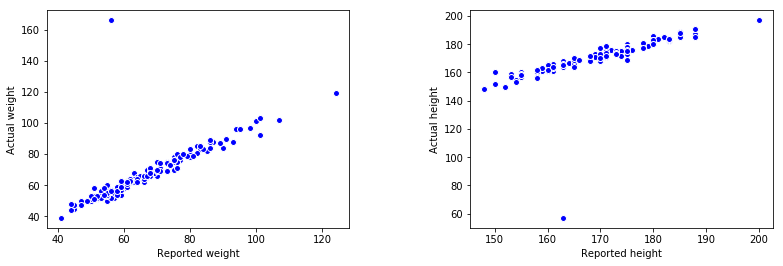

In [62]:
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
gs.update(wspace = 0.4, hspace = 0.4)
fig = plt.figure(figsize=(13, 4))

ax0 = plt.subplot(gs[0])
ax0.scatter(dataset.repwt, dataset.weight, marker="o", edgecolors="white", c="blue")
ax0.set_xlabel("Reported weight")
ax0.set_ylabel("Actual weight")

ax1 = plt.subplot(gs[1])
ax1.scatter(dataset.repht, dataset.height, marker="o", edgecolors="white", c="blue")
ax1.set_xlabel("Reported height")
ax1.set_ylabel("Actual height")
;

### Frequentist linear regression
## $Y =X\beta + \epsilon$<br>
$Y$ - predicted output, dependent variable<br>
$X$ - predictor, independent variable<br>
$\beta$ - model parementer, coefficient<br>
$\epsilon$ - error term (normally distributed)<br>

Fitting method: ordinary least squares, maximum likelihood

In [92]:
x = dataset.weight
Y = dataset.repht
X = sm.add_constant(x)
model = sm.OLS(Y, X,)
results = model.fit()

/home/maciek/miniconda3/envs/stat/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
